In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import glob
import os

In [2]:
""" def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images """

In [3]:
#load_images_from_folder('D:\Bui Tuan\License Plate Recognition (NDBSX)\plate_car\plate_car1')

In [8]:
#len(img)

In [9]:
#img[1]

In [11]:
#for img in glob.glob("D:/Bui Tuan/License Plate Recognition (NDBSX)/plate_car/plate_car1/*.jpg"):
    #cv_img = cv2.imread(img)

In [8]:
len(cv_img)

376

In [14]:
#cv_img[1]

In [56]:
#plt.imshow(cv_img[375])

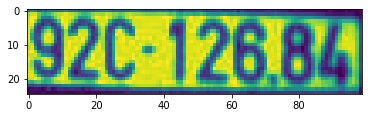

In [10]:
plt.imshow(cv_img[0])

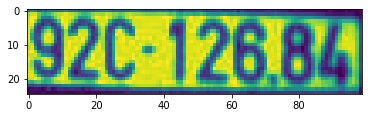

In [11]:
plt.imshow(img)

In [16]:
#cv_img.dtype

In [17]:
#len(cv_img)

In [18]:
#plt.imshow(img)
#plt.show()
#print(img.shape)

In [25]:
cv_img = []
for img in glob.glob("D:/Bui Tuan/License Plate Recognition (NDBSX)/plate_car/plate_car/*.jpg"):
    name_img=img.split("/")[-1] 
    n= cv2.imread(img,0)
    cv_img.append(n)

In [37]:
img = cv_img[144].copy()

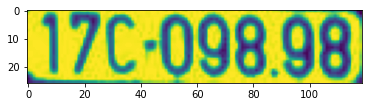

In [38]:
plt.imshow(img)

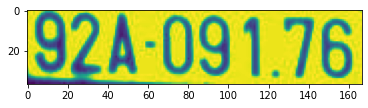

In [408]:
img = cv2.imread("D:/Bui Tuan/License Plate Recognition (NDBSX)/plate_car/plate_car/00004764_92A09176.jpg.jpg",0)
plt.imshow(img)

In [409]:
import cv2 # For OpenCV modules (For Image I/O and Contour Finding)
import numpy as np # For general purpose array manipulation
import scipy.fftpack # For FFT2 

#### imclearborder definition

def imclearborder(imgBW, radius):

    # Given a black and white image, first find all of its contours
    imgBWcopy = imgBW.copy()
    contours,hierarchy = cv2.findContours(imgBWcopy.copy(), cv2.RETR_LIST, 
        cv2.CHAIN_APPROX_SIMPLE)

    # Get dimensions of image
    imgRows = imgBW.shape[0]
    imgCols = imgBW.shape[1]    

    contourList = [] # ID list of contours that touch the border

    # For each contour...
    for idx in np.arange(len(contours)):
        # Get the i'th contour
        cnt = contours[idx]

        # Look at each point in the contour
        for pt in cnt:
            rowCnt = pt[0][1]
            colCnt = pt[0][0]

            # If this is within the radius of the border
            # this contour goes bye bye!
            check1 = (rowCnt >= 0 and rowCnt < radius) or (rowCnt >= imgRows-1-radius and rowCnt < imgRows)
            check2 = (colCnt >= 0 and colCnt < radius) or (colCnt >= imgCols-1-radius and colCnt < imgCols)

            if check1 or check2:
                contourList.append(idx)
                break

    for idx in contourList:
        cv2.drawContours(imgBWcopy, contours, idx, (0,0,0), -1)

    return imgBWcopy

#### bwareaopen definition
def bwareaopen(imgBW, areaPixels):
    # Given a black and white image, first find all of its contours
    imgBWcopy = imgBW.copy()
    contours,hierarchy = cv2.findContours(imgBWcopy.copy(), cv2.RETR_LIST, 
        cv2.CHAIN_APPROX_SIMPLE)

    # For each contour, determine its total occupying area
    for idx in np.arange(len(contours)):
        area = cv2.contourArea(contours[idx])
        if (area >= 0 and area <= areaPixels):
            cv2.drawContours(imgBWcopy, contours, idx, (0,0,0), -1)

    return imgBWcopy

#### Main program



In [410]:
rows = img.shape[0]
cols = img.shape[1]

In [411]:
# Convert image to 0 to 1, then do log(1 + I)
imgLog = np.log1p(np.array(img, dtype="float") / 255)

# Create Gaussian mask of sigma = 10
M = 2*rows + 1
N = 2*cols + 1
sigma = 10
(X,Y) = np.meshgrid(np.linspace(0,N-1,N), np.linspace(0,M-1,M))
centerX = np.ceil(N/2)
centerY = np.ceil(M/2)
gaussianNumerator = (X - centerX)**2 + (Y - centerY)**2



In [412]:
# Low pass and high pass filters
Hlow = np.exp(-gaussianNumerator / (2*sigma*sigma))
Hhigh = 1 - Hlow



In [413]:
# Move origin of filters so that it's at the top left corner to
# match with the input image
HlowShift = scipy.fftpack.ifftshift(Hlow.copy())
HhighShift = scipy.fftpack.ifftshift(Hhigh.copy())



In [414]:
# Filter the image and crop
If = scipy.fftpack.fft2(imgLog.copy(), (M,N))
Ioutlow = scipy.real(scipy.fftpack.ifft2(If.copy() * HlowShift, (M,N)))
Iouthigh = scipy.real(scipy.fftpack.ifft2(If.copy() * HhighShift, (M,N)))



<ipython-input-414-20198025d7bd>:3: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
  Ioutlow = scipy.real(scipy.fftpack.ifft2(If.copy() * HlowShift, (M,N)))
<ipython-input-414-20198025d7bd>:4: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
  Iouthigh = scipy.real(scipy.fftpack.ifft2(If.copy() * HhighShift, (M,N)))


In [433]:
# Set scaling factors and add
gamma1 = 0.2
gamma2 = 1.5
Iout = gamma1*Ioutlow[0:rows,0:cols] + gamma2*Iouthigh[0:rows,0:cols]



In [434]:
# Anti-log then rescale to [0,1]
Ihmf = np.expm1(Iout)
Ihmf = (Ihmf - np.min(Ihmf)) / (np.max(Ihmf) - np.min(Ihmf))
Ihmf2 = np.array(255*Ihmf, dtype="uint8")



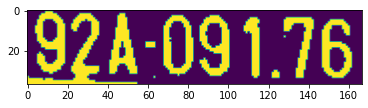

In [443]:
# Threshold the image - Anything below intensity 65 gets set to white
Ithresh = Ihmf2 < 90
Ithresh = 255*Ithresh.astype("uint8")
plt.imshow(Ithresh)


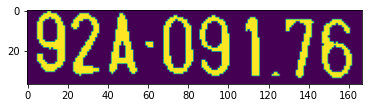

In [439]:
# Clear off the border.  Choose a border radius of 5 pixels
Iclear = imclearborder(Ithresh, 0.0)
plt.imshow(Iclear)


In [444]:
cv2.imwrite("D:/Bui Tuan/License Plate Recognition (NDBSX)/plate_car/process image/process image/92A09176.jpg", Ithresh)

True

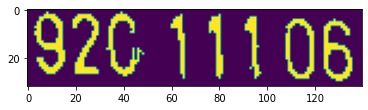

In [460]:
# Eliminate regions that have areas below 120 pixels
Iopen = bwareaopen(Iclear, 20)
plt.imshow(Iopen)

In [115]:
cv2.imwrite("D:/Bui Tuan/Iopen3.jpg", Iopen)

True

In [ ]:
image_paths = globals